In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


MAGIC Gamma Telescope
Donated on 4/30/2007

In [23]:
cols = ["fLenght", "fWidth", "fSize", "fCond", "fConcl", "fAsym", "fM3Long", "fm3Trans", "fAlpha", "fDist", "class" ]
df= pd.read_csv("../data/raw/magic+gamma+telescope/magic04.data", names =cols)
df.head()

,fLenght,fWidth,fSize,fCond,fConcl,fAsym,fM3Long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [24]:
df["class"].unique()

array(['g', 'h'], dtype=object)

convert it to int

In [25]:
df["class"]= (df["class"] == "g").astype(int)

In [26]:
df["class"].unique()

array([1, 0])

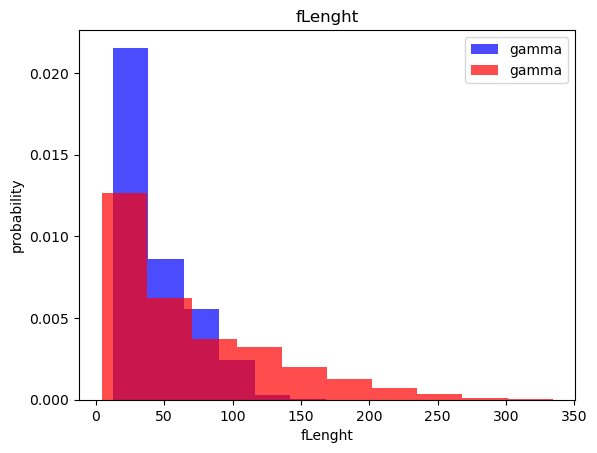

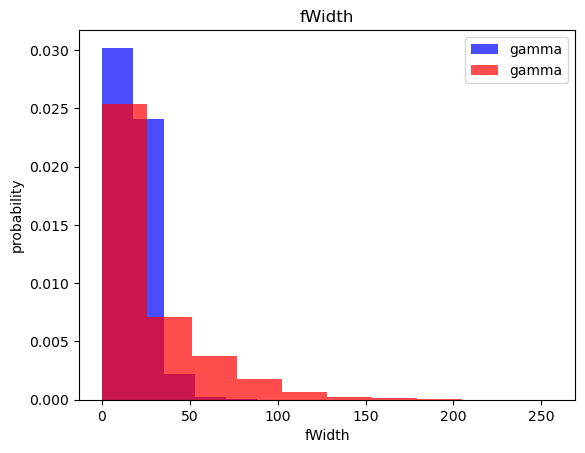

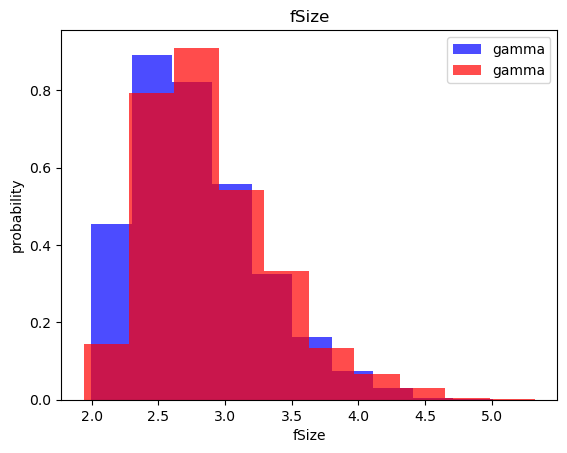

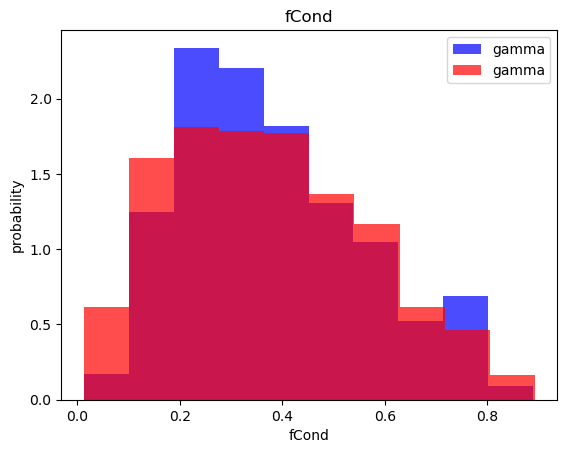

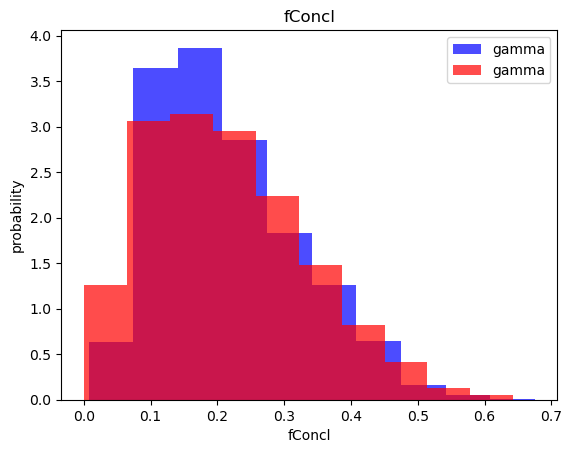

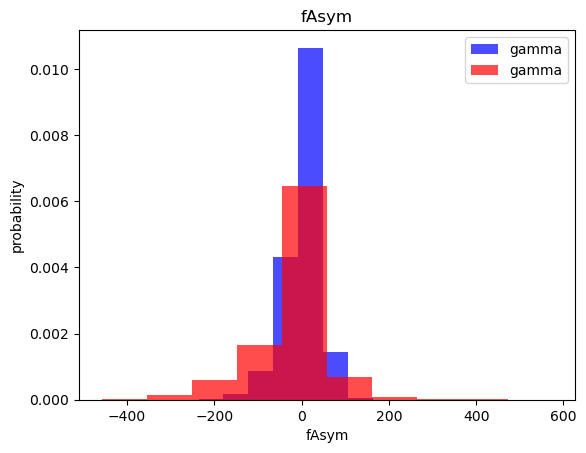

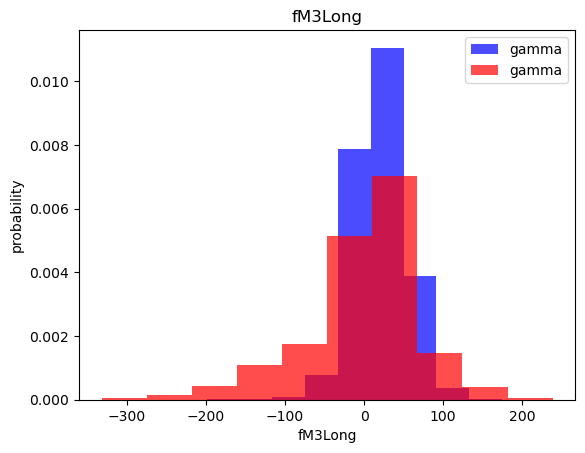

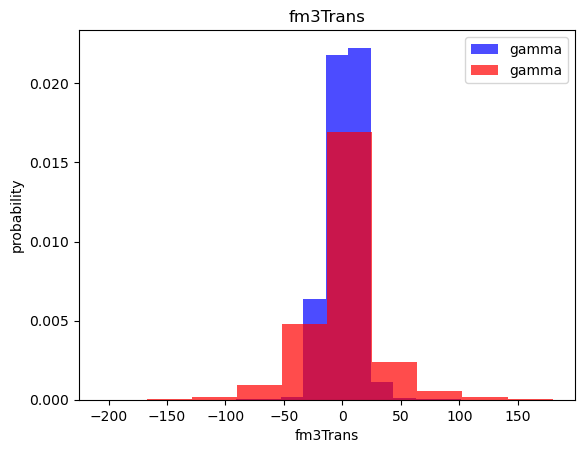

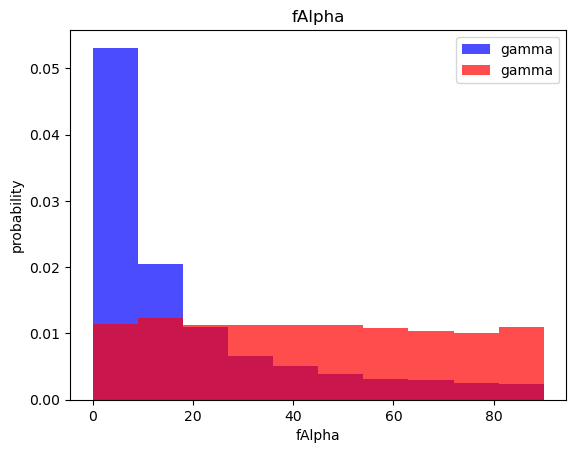

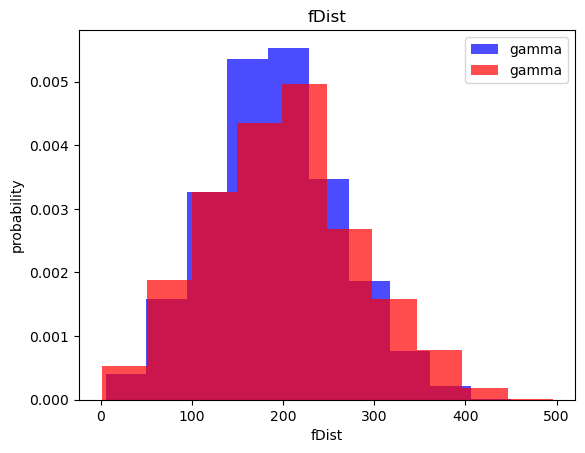

In [27]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label] ,color= 'blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label] ,color= 'red', label='gamma', alpha=0.7, density=True)

    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation, test datasets

In [ ]:
X= df.drop("class",axis=1).values
y= df["class"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


# 1. First split -> train (70%) + temp(30%)
X_train, X_temp, y_train, y_temp= train_test_split(
    X,y,
    test_size=0.7, #70% goes to temp
    stratify= y, #split the data but keep the class proportions the same
    random_state=42
)

# 2. Second split -> Valid (15%) + temp(15%)
X_valid, X_test, y_valid, y_test= train_test_split(
    X_temp, y_temp,
    test_size= 0.5,
    stratify= y_temp,
    random_state=42
)

# 3. Oversampling ONLY on trainig set 
ros= RandomOverSampler (random_state=42)
X_train_res, y_train_res= ros.fit_resample(X_train, y_train)

# 4. Standard Scaler 
#   - fit only on oversampled train 
#   - transform valid and test

scaler = StandardScaler()

X_train_res = scaler.fit_transform(X_train_res)
X_valid     = scaler.transform(X_valid)
X_test      = scaler.transform(X_test)


